# Quantum Hadamard Edge Detection (QHED)

In this notebook, the implemenation of the Hadamard edge detection algorithm (version with an auxiliary qubit) is tested. All results are run on a simulator, not on real quantum hardware. 

For more details see https://arxiv.org/pdf/1801.01465.pdf.

In [1]:
from pathlib import Path
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

from quantum_edge_detector import HadamardEdgeDetector, convert_to_grayscale

In [2]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright

In [3]:
path = Path("images")
image_file = path / "qubit_icon.jpg"
image_file.exists()

True

In [4]:
# open the image and get the resolution
img = Image.open(str(image_file))
width, height = img.size
image_size = width
print(f"Image Resolution: {width} x {height}")

Image Resolution: 256 x 256


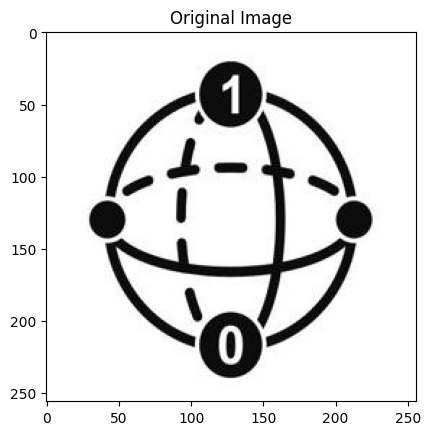

In [5]:
# display the image
image = mpimg.imread(image_file)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.show()

In [6]:
# convert the RBG component of the image to gray scale
image = np.array(Image.open(image_file))
image = convert_to_grayscale(image)

### Horizontal edge scan

In [7]:
# run the horizontal edge detection
data =  np.array(image).reshape(1, image_size, image_size)
edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
reverted_image = edge_detector.edge_scan(
    data,
    threshold=1e-2,
    horizontal=True,
    vertical=False,
).reshape(image_size, image_size)

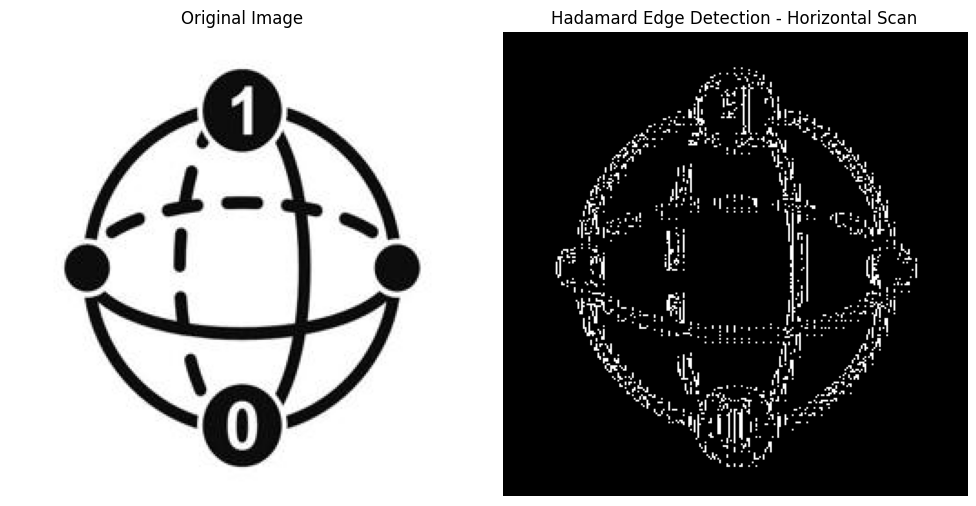

In [8]:
# plot the original and edge-detected image (only horizonatl scan)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection - Horizontal Scan")
plt.axis("off")

plt.tight_layout()
plt.show()

### Vertical scan

In [9]:
# run the vertical edge detection
data =  np.array(image).reshape(1, image_size, image_size)
edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
reverted_image = edge_detector.edge_scan(
    data,
    threshold=1e-2,
    horizontal=False,
    vertical=True,
).reshape(image_size, image_size)

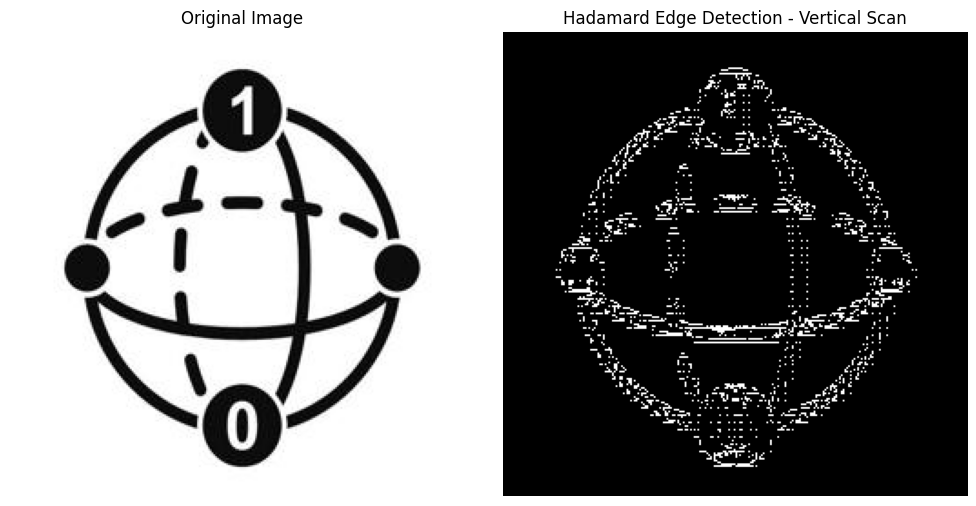

In [10]:
# plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection - Vertical Scan")
plt.axis("off")

plt.tight_layout()
plt.show()

### Horizontal & Vertical Scan

In [11]:
# run the edge detection
data =  np.array(image).reshape(1, image_size, image_size)
edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
reverted_image = edge_detector.edge_scan(
    data,
    threshold=1e-2,
    horizontal=True,
    vertical=True,
).reshape(image_size, image_size)

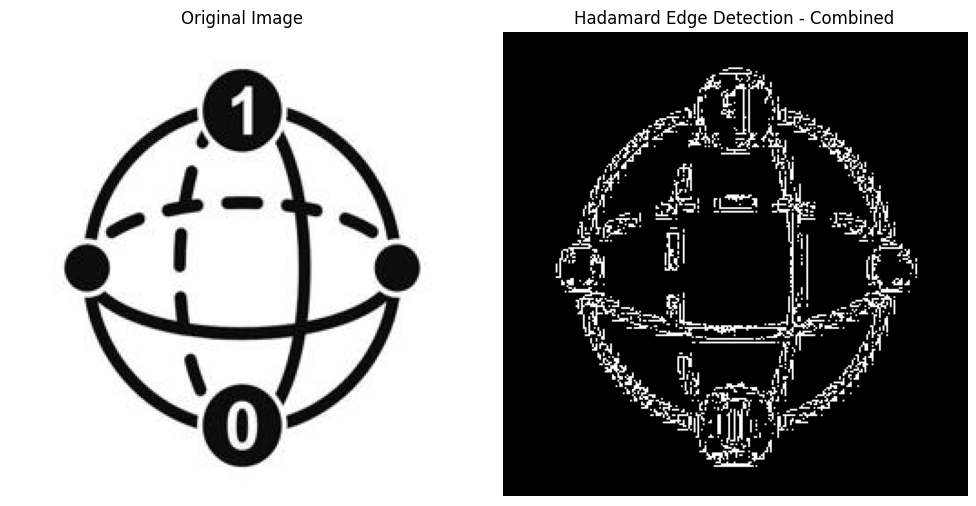

In [12]:
# plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection - Combined")
plt.axis("off")

plt.tight_layout()
plt.show()

## Canny Edge Detection

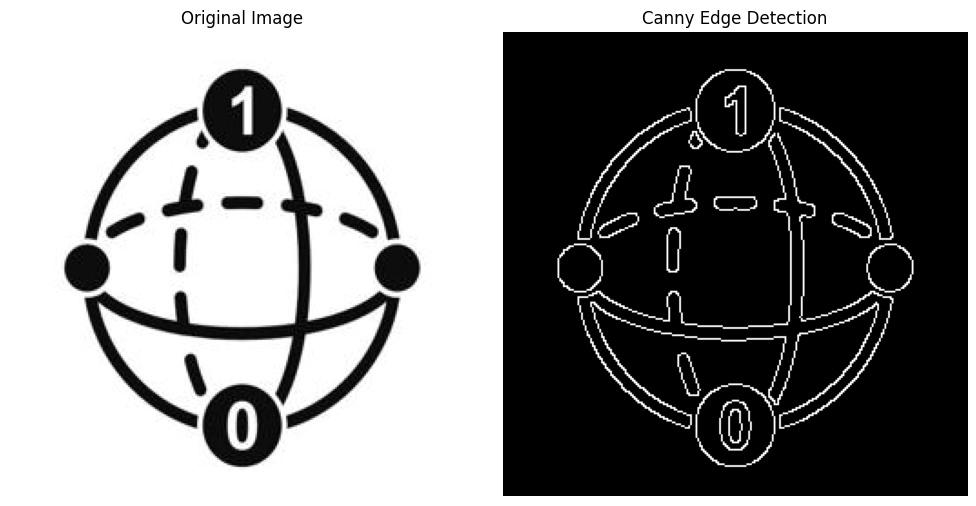

In [13]:
# read the image using OpenCV
img = cv2.imread(str(image_file), cv2.IMREAD_GRAYSCALE)
# apply Canny edge detection
edges = cv2.Canny(img, 100, 200)  # Parameters: (image, threshold1, threshold2)

# plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.tight_layout()

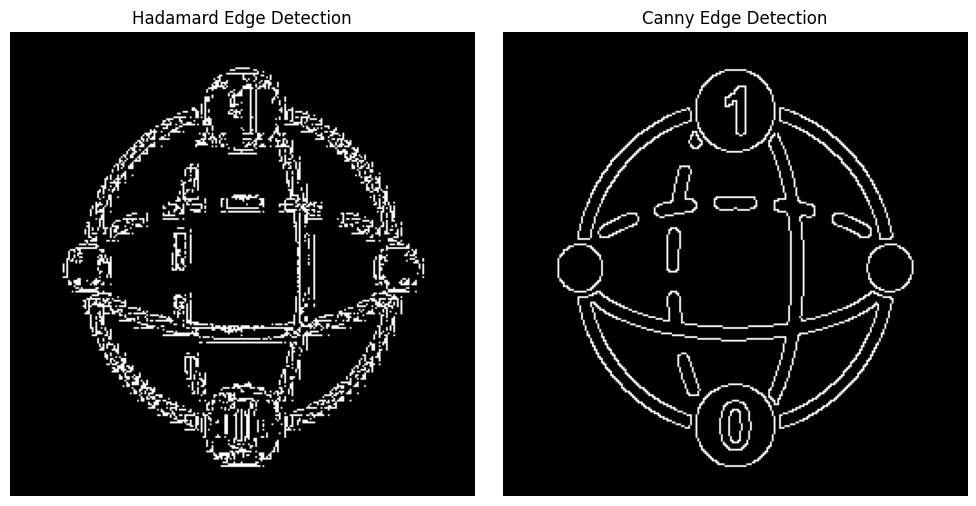

In [14]:
# plot the a comparison between edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.tight_layout()

## Other examples

In [15]:
path = Path("images")
image_file = path / "road_sign.png"
image_file.exists()

True

In [16]:
# open the image and get the resolution
img = Image.open(str(image_file))
width, height = img.size
image_size = width
print(f"Image Resolution: {width} x {height}")

Image Resolution: 224 x 224


In [17]:
# run the edge detection
image = np.array(Image.open(image_file))
image = convert_to_grayscale(image)
data =  np.array(image).reshape(1, image_size, image_size)
edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
reverted_image = edge_detector.edge_scan(
    data,
    threshold=1e-2,
    horizontal=True,
    vertical=True,
).reshape(image_size, image_size)

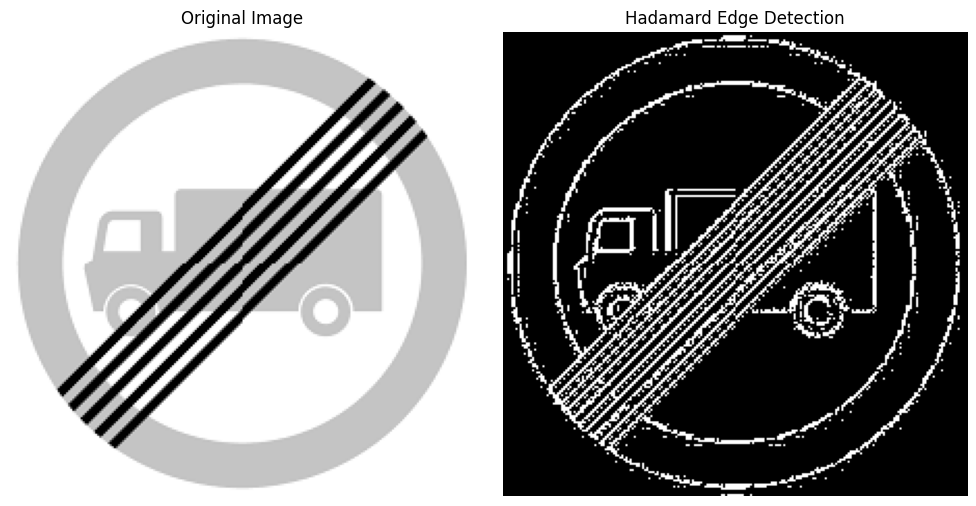

In [18]:
# plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

In [19]:
path = Path("images")
image_file = path / "sgd_logo.png"
image_file.exists()

True

In [20]:
# open the image and get the resolution
img = Image.open(str(image_file))
width, height = img.size
image_size = width
print(f"Image Resolution: {width} x {height}")

Image Resolution: 224 x 224


In [21]:
# run the edge detection
image = np.array(Image.open(image_file))
image = convert_to_grayscale(image)
data =  np.array(image).reshape(1, image_size, image_size)
edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
reverted_image = edge_detector.edge_scan(
    data,
    threshold=1e-3,
    horizontal=True,
    vertical=True,
).reshape(image_size, image_size)

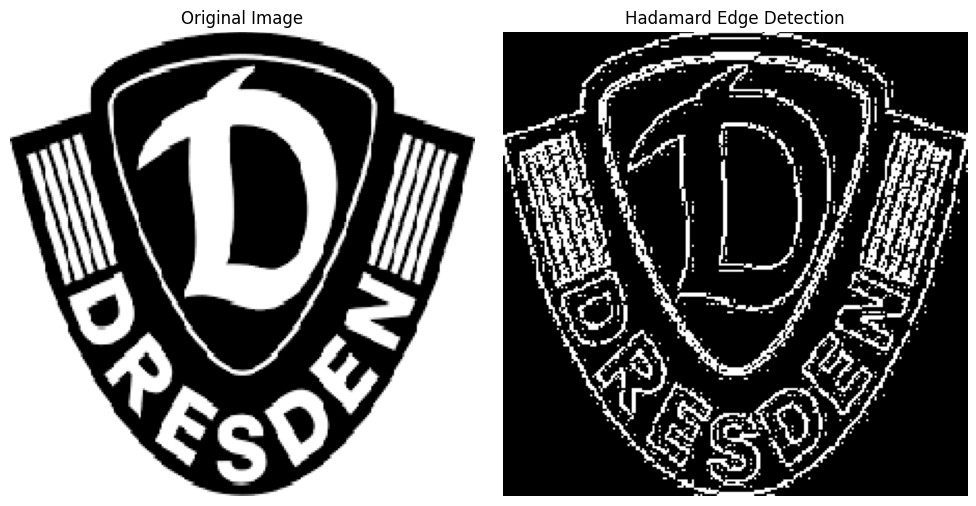

In [22]:
# plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
path = Path("images")
image_file = path / "edgeflower.jpg"
image_file.exists()

True

In [24]:
# open the image and get the resolution
img = Image.open(str(image_file))
width, height = img.size
image_size = width
print(f"Image Resolution: {width} x {height}")

Image Resolution: 256 x 256


In [25]:
# run the edge detection
image = np.array(Image.open(image_file))
image = convert_to_grayscale(image)
data =  np.array(image).reshape(1, image_size, image_size)
edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
reverted_image = edge_detector.edge_scan(
    data,
    threshold=1e-3,
    horizontal=True,
    vertical=True,
).reshape(image_size, image_size)

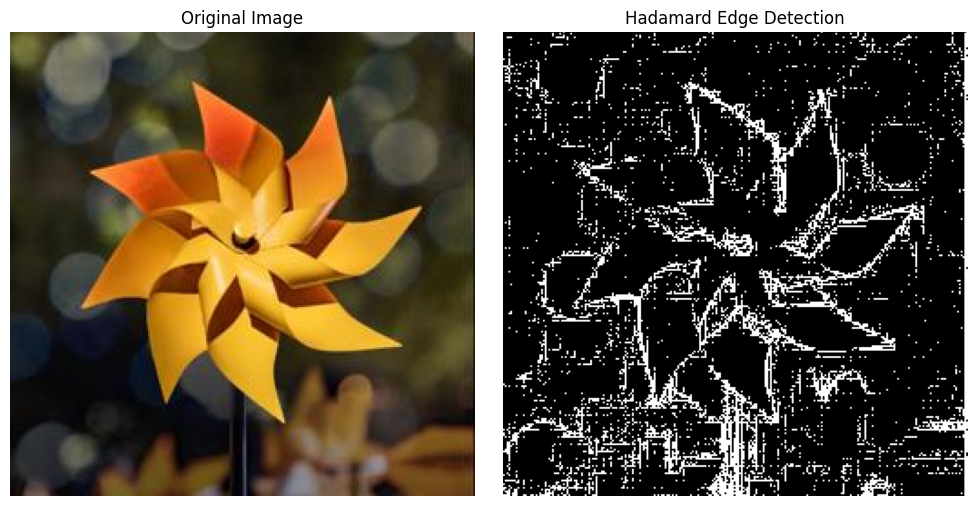

In [26]:
# plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reverted_image, cmap="gray")
plt.title("Hadamard Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

## Check influence of `threshold` parameter

In [27]:
path = Path("images")
image_file = path / "qubit_icon.jpg"

img = Image.open(str(image_file))
width, height = img.size
image_size = width
print(f"Image Resolution: {width} x {height}")

Image Resolution: 256 x 256


In [28]:
image = np.array(Image.open(image_file))
image = convert_to_grayscale(image)
data =  np.array(image).reshape(1, image_size, image_size)

In [29]:
# define thresholds
thresholds = [10**(-x) for x in range(0, 6)]
thresholds

[1, 0.1, 0.01, 0.001, 0.0001, 1e-05]

threshold=1


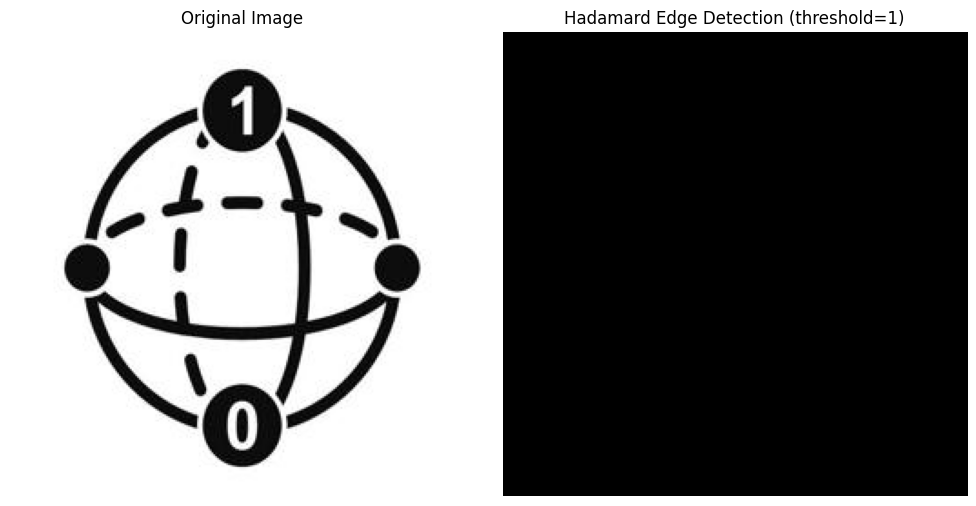

threshold=0.1


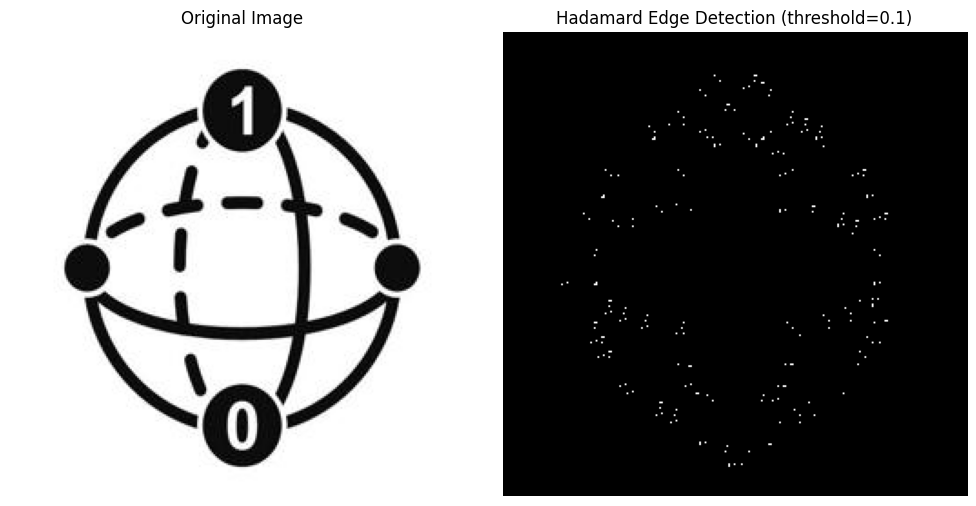

threshold=0.01


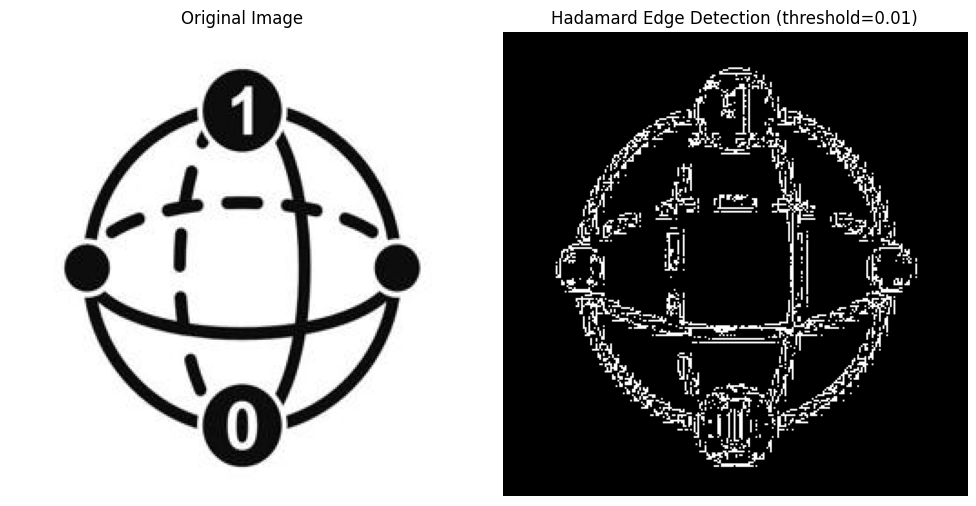

threshold=0.001


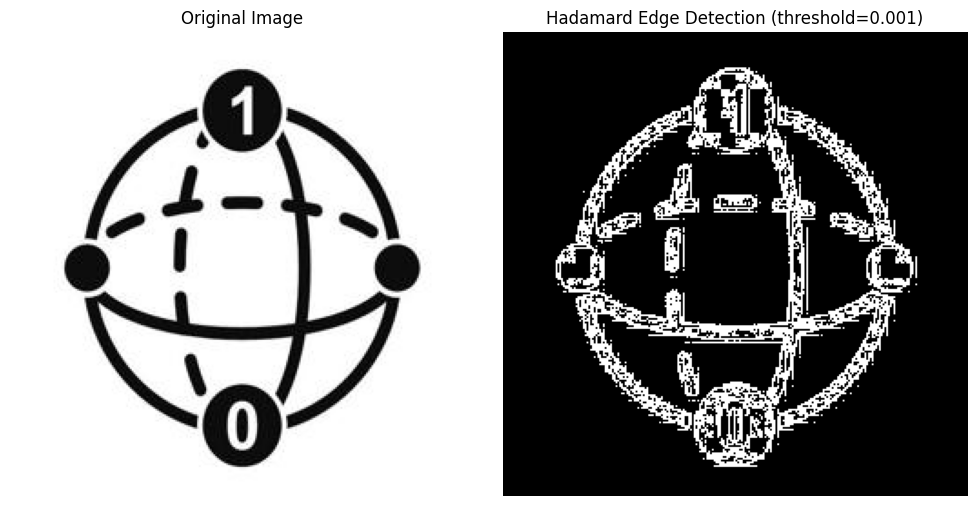

threshold=0.0001


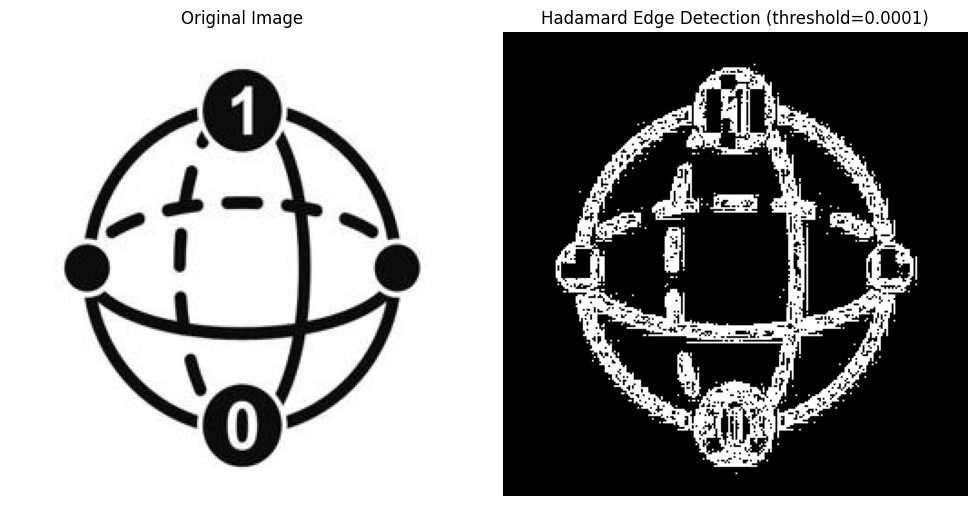

threshold=1e-05


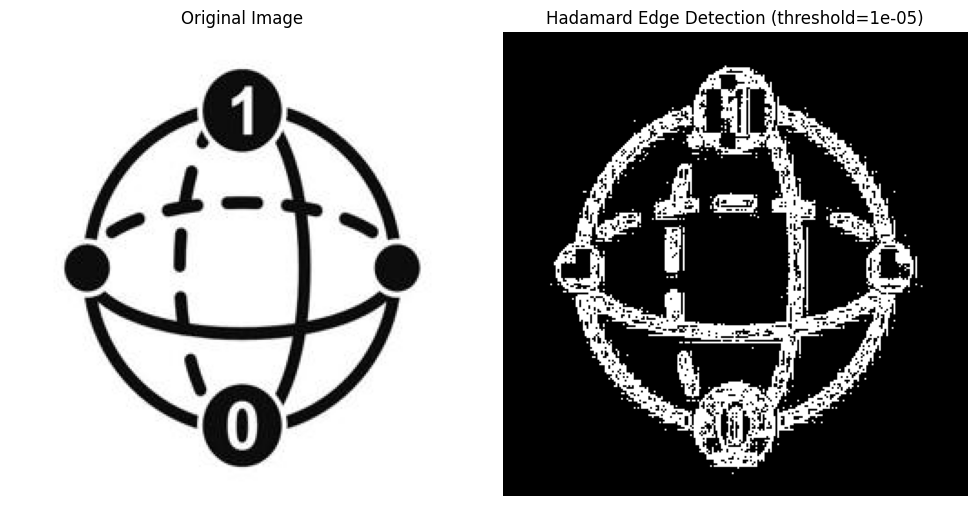

In [31]:
# loop over all thresholds
for threshold in thresholds:
    print(f"{threshold=}")
    data =  np.array(image).reshape(1, image_size, image_size)
    edge_detector = HadamardEdgeDetector(window_size=4, shots=2**10, backend="aer_simulator")
    reverted_image = edge_detector.edge_scan(
        data,
        threshold=threshold,
        horizontal=True,
        vertical=True,
    ).reshape(image_size, image_size)
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(reverted_image, cmap="gray")
    plt.title(f"Hadamard Edge Detection ({threshold=})")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()